# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hecto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [5]:
# Print total articles
print(f"articles about Bitcoin: {Bitcoin_articles['totalResults']}")

articles about Bitcoin: 9811


In [6]:
# Fetch the Ethereum news articles
# Fetch the Ethereum news articles
Ethereum_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

In [7]:
# Print total articles
print(f"articles about Ethereum: {Ethereum_articles['totalResults']}")

articles about Ethereum: 4508


In [8]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_articles["articles"]:
    try:
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "title": title,
            "description": description,
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass 

In [9]:
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments) 

# Reorder DataFrame columns
cols = ["date","title","description","text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]
Bitcoin_df.head()

,date,title,description,text,compound,positive,negative,neutral
0,2022-06-03,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-06-09,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
2,2022-06-08,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,2022-06-05,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,2022-06-02,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [10]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_articles["articles"]:
    try:
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "title": title,
            "description": description,
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [11]:
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date","title","description","text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]
Ethereum_df.head()

,date,title,description,text,compound,positive,negative,neutral
0,2022-06-24,‘Axie Infinity’ hack victims will only get bac...,"Sky Mavis, the developer of blockchain game Ax...","Sky Mavis, the developer of blockchain game Ax...",-0.7184,0.000,0.154,0.846
1,2022-06-23,"Guy Who Told Everyone to Buy Ethereum at $2,90...","Jim Cramer, the CNBC host who’s reportedly wor...","Jim Cramer, the CNBC host whos reportedly wort...",0.5106,0.107,0.000,0.893
2,2022-06-18,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...","The price of Ethereum has dropped below $1,250...",0.2732,0.063,0.000,0.937
3,2022-06-07,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
4,2022-06-09,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866


In [12]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.032991,0.070080,0.061370,0.868610
std,0.431175,0.070138,0.068152,0.085287
min,-0.948500,0.000000,0.000000,0.628000
25%,-0.296000,0.000000,0.000000,0.821750
50%,0.000000,0.068000,0.058500,0.867500
75%,0.366350,0.119500,0.099000,0.926250
max,0.865500,0.269000,0.372000,1.000000


In [13]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.082017,0.080150,0.056470,0.863340
std,0.472651,0.079209,0.068564,0.090089
min,-0.948500,0.000000,0.000000,0.604000
25%,-0.284450,0.000000,0.000000,0.813500
50%,0.000000,0.067500,0.046500,0.867500
75%,0.440400,0.124500,0.091750,0.925000
max,0.916900,0.349000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etheruem

Q: Which coin had the highest compound score?

A: Ethereum max compound score was .91 whereas Bitcoin was .86.

Q. Which coin had the highest positive score?

A: Bitcoin did with a max positive score of 0.20 and Ethereum had 0.17.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import pandas as pd

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()



# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_expand = {'ok', 'another', 'move', 'always', 'find', 'never', 'meet','n'}

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    filtered_words = [word for word in sw if word not in stopwords.words('english')]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
Bitcoin_df['tokens'] = Bitcoin_df['text'].apply(word_tokenize)
Bitcoin_df.head()

,date,title,description,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmakers, have, passed, a, bill, ..."
1,2022-06-09,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[Rapper, and, entrepreneur, Shawn, Carter, ,, ..."
2,2022-06-08,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[A, new, study, on, bitcoin, calls, into, ques..."
3,2022-06-05,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[Image, caption, ,, President, Faustin-Archang..."
4,2022-06-02,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[You, can, now, reportedly, pay, for, your, bu..."


In [18]:
# Create a new tokens column for Ethereum
Ethereum_df['tokens'] = Ethereum_df['text'].apply(word_tokenize)
Ethereum_df.head()

,date,title,description,text,compound,positive,negative,neutral,tokens
0,2022-06-24,‘Axie Infinity’ hack victims will only get bac...,"Sky Mavis, the developer of blockchain game Ax...","Sky Mavis, the developer of blockchain game Ax...",-0.7184,0.000,0.154,0.846,"[Sky, Mavis, ,, the, developer, of, blockchain..."
1,2022-06-23,"Guy Who Told Everyone to Buy Ethereum at $2,90...","Jim Cramer, the CNBC host who’s reportedly wor...","Jim Cramer, the CNBC host whos reportedly wort...",0.5106,0.107,0.000,0.893,"[Jim, Cramer, ,, the, CNBC, host, whos, report..."
2,2022-06-18,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...","The price of Ethereum has dropped below $1,250...",0.2732,0.063,0.000,0.937,"[The, price, of, Ethereum, has, dropped, below..."
3,2022-06-07,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[The, ability, to, conduct, external, transfer..."
4,2022-06-09,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[A, decentralized, autonomous, organization, ,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
bit_tokenizer = tokenizer(text)
print(bit_tokenizer)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\hecto/nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\share\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\lib\\nltk_data'
    - 'C:\\Users\\hecto\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [23]:
# Generate the Bitcoin N-grams where N=2
def word_counter(corpus): 
    string = ' '.join(corpus.text)
    processed = tokenizer(string)
    bigrams = ngrams(processed, n=2)# Generate the Bitcoin N-grams where N=2
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
    
word_counter(Bitcoin_df)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\hecto/nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\share\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\lib\\nltk_data'
    - 'C:\\Users\\hecto\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [25]:
# Generate the Ethereum N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = ' '.join(Bitcoin_df.text)
processed_btc = tokenizer(top10_btc) 
token_count(processed_btc)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\hecto/nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\share\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\lib\\nltk_data'
    - 'C:\\Users\\hecto\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [28]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = ' '.join(Ethereum_df.text)
processed_eth = tokenizer(top10_eth) 
token_count(processed_eth)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\hecto/nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\share\\nltk_data'
    - 'c:\\Users\\hecto\\anaconda3\\envs\\dev\\lib\\nltk_data'
    - 'C:\\Users\\hecto\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

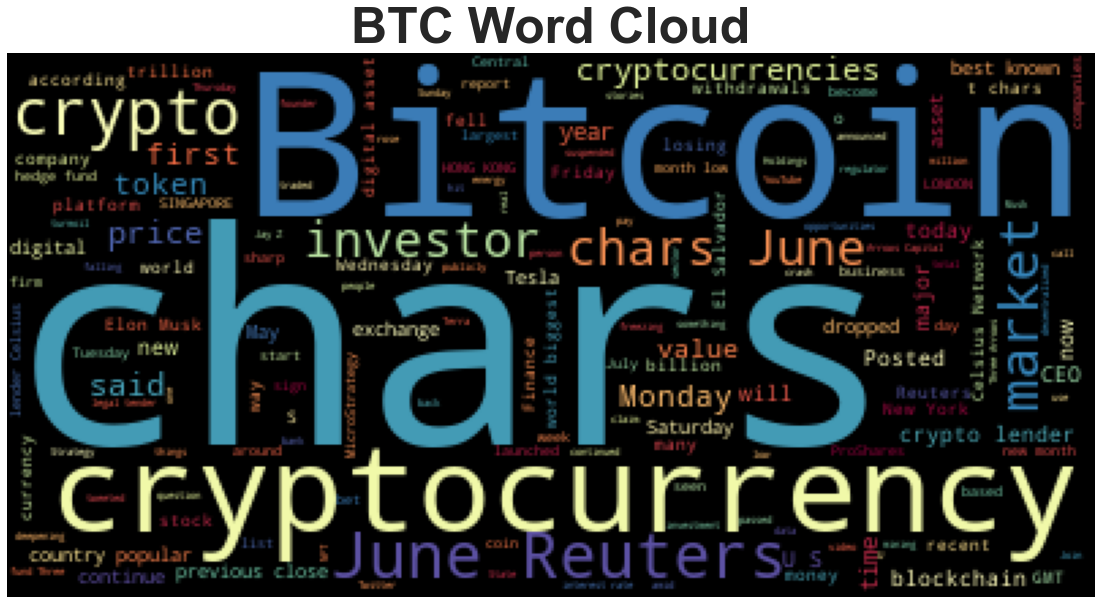

In [30]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wordcloud = WordCloud(colormap="Spectral_r").generate(Bitcoin_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("BTC Word Cloud", fontdict=fontdict)
plt.show()

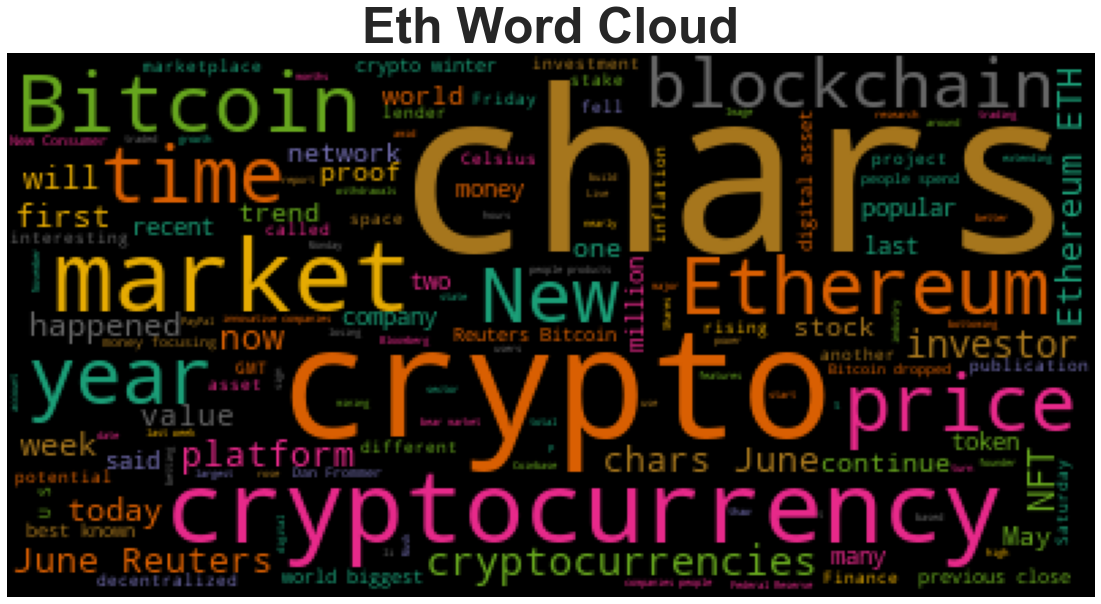

In [31]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud = WordCloud(colormap="Dark2_r").generate(Ethereum_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Eth Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bit_cat_text = Bitcoin_df.text.str.cat()

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(bit_cat_text)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data['title'] = "Bitcoin NER"

In [37]:
# Render the visualization
# YOUR CODE HERE!
options = {"compact": True, "color": "blue", "word_spacing": 25}
displacy.render(btc_doc, style='ent', options=options)

In [38]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

New York GPE
Friday DATE
36-27 CARDINAL
Shawn Carter PERSON
Jay-Z PERSON
Thursday DATE
Jay-Z PERSON
Jack Dorsey PERSON
Faustin-Archange Touadéra LAW
The Central African Republic's ORG
Bitcoin NORP
first ORDINAL
Joe TidyCyber PERSON
this week DATE
billions CARDINAL
Bitcoin NORP
Salvador ORG
hundreds CARDINAL
last year DATE
J. Dubner PERSON
Freakonomics Radio
 ORG
Recommended Listening ORG
Freakonomics Radio ORG
three CARDINAL
Bi ORG
+734 GPE
Chipotle ORG
The Paris NFT Day EVENT
The Celsius Network PRODUCT
DeFi GPE
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
13 CARDINAL
Reuters ORG
12.1% PERCENT
23,366 MONEY
GMT WORK_OF_ART
Monday DATE
3,218.95 MONEY
51.6% PERCENT
June 14 DATE
Reuters ORG
Tuesday DATE
MicroStrategy Inc ORG
16 CARDINAL
Reuters ORG
7.03% PERCENT
20,969.32 MONEY
GMT WORK_OF_ART
Thursday DATE
1,585.95 MONEY
56.5% PERCENT
18 CARDINAL
Reuters ORG
7.46% PERCENT
18,915.29 MONEY
15:59 CARDINAL
GMT WORK_OF_

---

### Ethereum NER

In [39]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_cat_text = Ethereum_df.text.str.cat()

In [40]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_cat_text)
eth_doc

# Add a title to the document
eth_doc.user_data['title'] = "Etheteum NER"

In [41]:
# Render the visualization
# YOUR CODE HERE!
# Render the visualization
options = {"compact": True, "color": "blue", "word_spacing": 25}
displacy.render(eth_doc, style='ent', options=options)

In [42]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Sky Mavis PERSON
$617 million MONEY
earlier this year DATE
$25.5 million MONEY
USD ORG
CNBC ORG
at least $150 million MONEY
Gen Z PERSON
Brooklyn GPE
Ethereum ORG
1,250 MONEY
New England LOC
Connecticut GPE
Maine GPE
Massachusetts GPE
New Hampshire GPE
PayPal ORG
today DATE
U.S. GPE
DAO ORG
two CARDINAL
Blue Origin ORG
first ORDINAL
Gemini ORG
Ethereum (Cryptocurrency ORG
chars]New York GPE
Friday DATE
36-27 CARDINAL
eBay ORG
eBay ORG
today DATE
NFT ORG
KnownOrigin ORG
24/7 CARDINAL
18% PERCENT
about 1,100 CARDINAL
16 CARDINAL
Reuters ORG
7.03% PERCENT
20,969.32 MONEY
GMT WORK_OF_ART
Thursday DATE
1,585.95 MONEY
56.5% PERCENT
18 CARDINAL
Reuters ORG
7.46% PERCENT
18,915.29 MONEY
15:59 CARDINAL
GMT WORK_OF_ART
Saturday DATE
1,525.41 MONEY
60.8% PERCENT
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
13 CARDINAL
Reuters ORG
12.1% PERCENT
23,366 MONEY
GMT WORK_OF_ART
Monday DATE
3,218.95 MONEY
51.6% PERCENT
Buterin PER

---